In [80]:
import yfinance as yf
Tesla = yf.Ticker("TSLA")
#Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data.

tesla_data = Tesla.history(period="max")

#Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame

tesla_data.reset_index(inplace=True)
tesla_data.head(5)

Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0

In [81]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "lxml")  # or "html.parser"

# Using beautiful soup extract the table with Tesla Quarterly Revenue.
# creating new dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        tesla_revenue=tsla_revenue.append({'Date':date,'Revenue':revenue},
                                           ignore_index=True)
# removing null values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue']!='']
tesla_revenue.tail()

Date Revenue
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27
54  2009-06-30      27

In [82]:
#  ticker symbol of GameStop is GME
gamestop = yf.Ticker('GME')

# extracting stock information
gme_data=gamestop.history(period='max')

#reset the index
gme_data.reset_index(inplace=True)
gme_data.head()

Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [84]:
# using requests library to download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Save the text of the response
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "lxml")  # or "html.parser"
# Using beautiful soup extract the table with GameStop Quarterly Revenue
# creating new dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all('table')

table_index=0
for index, table in enumerate(tables):
    if ('GameStop Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # comma and dollar sign is removed
        revenue =col[1].text.replace("$", "").replace(",", "")
        gme_revenue=gme_revenue.append({'Date':date,'Revenue':revenue},
                                       ignore_index=True)
        
gme_revenue.tail()

Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

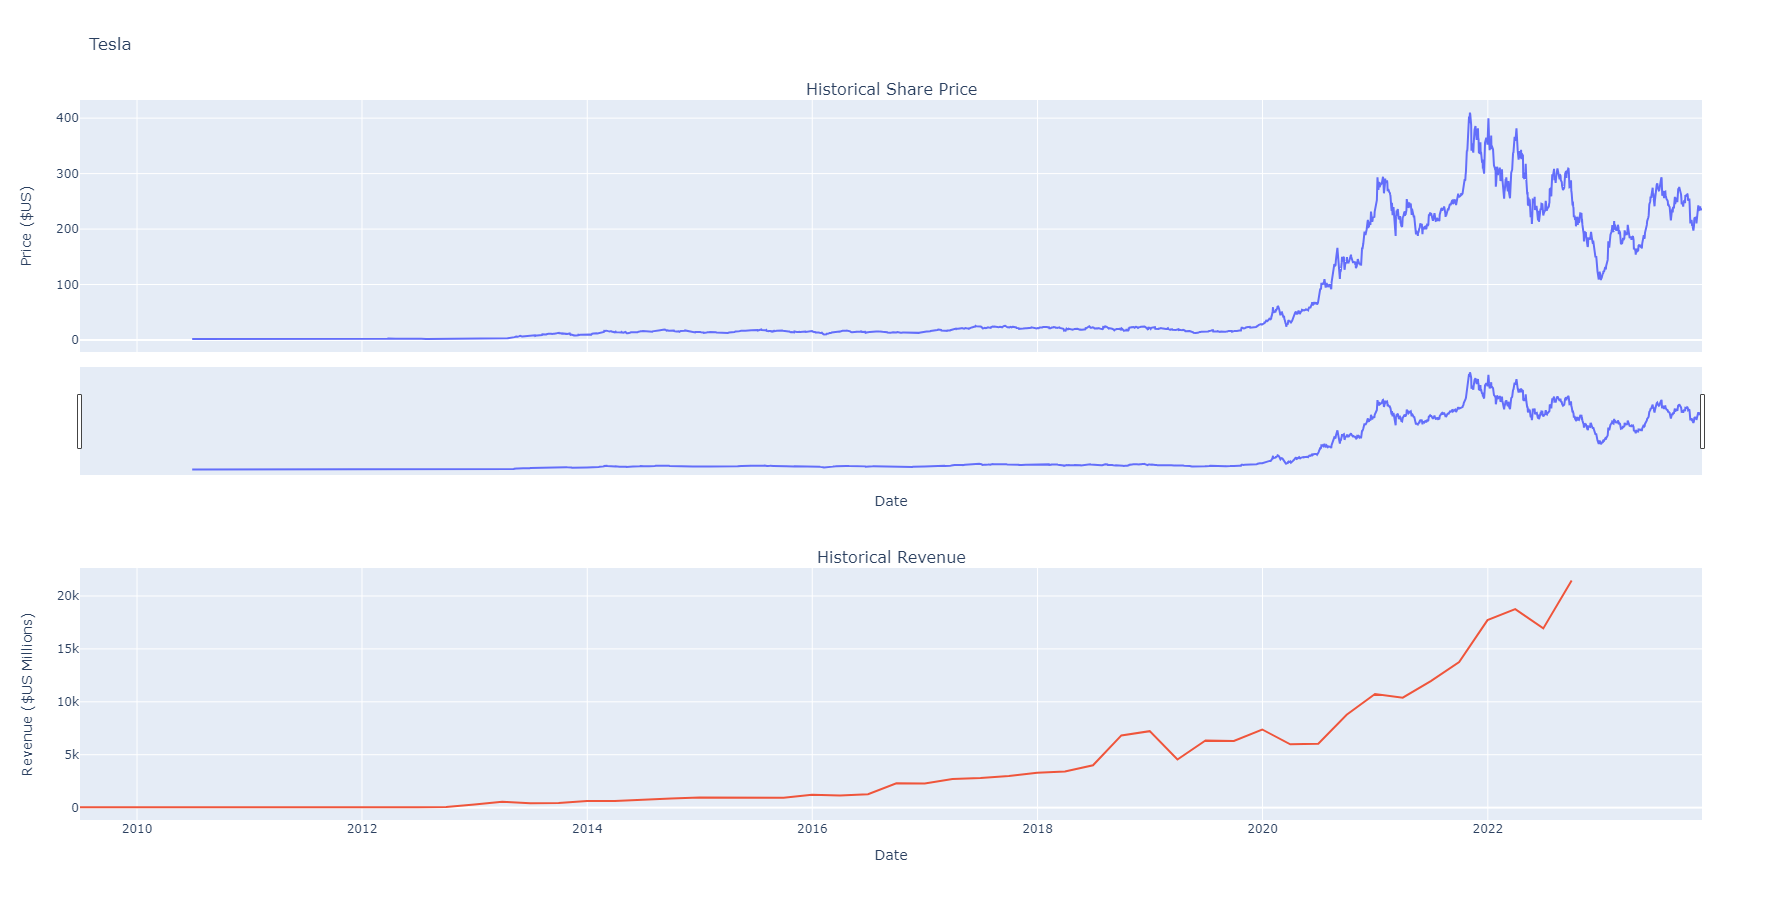

In [85]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')

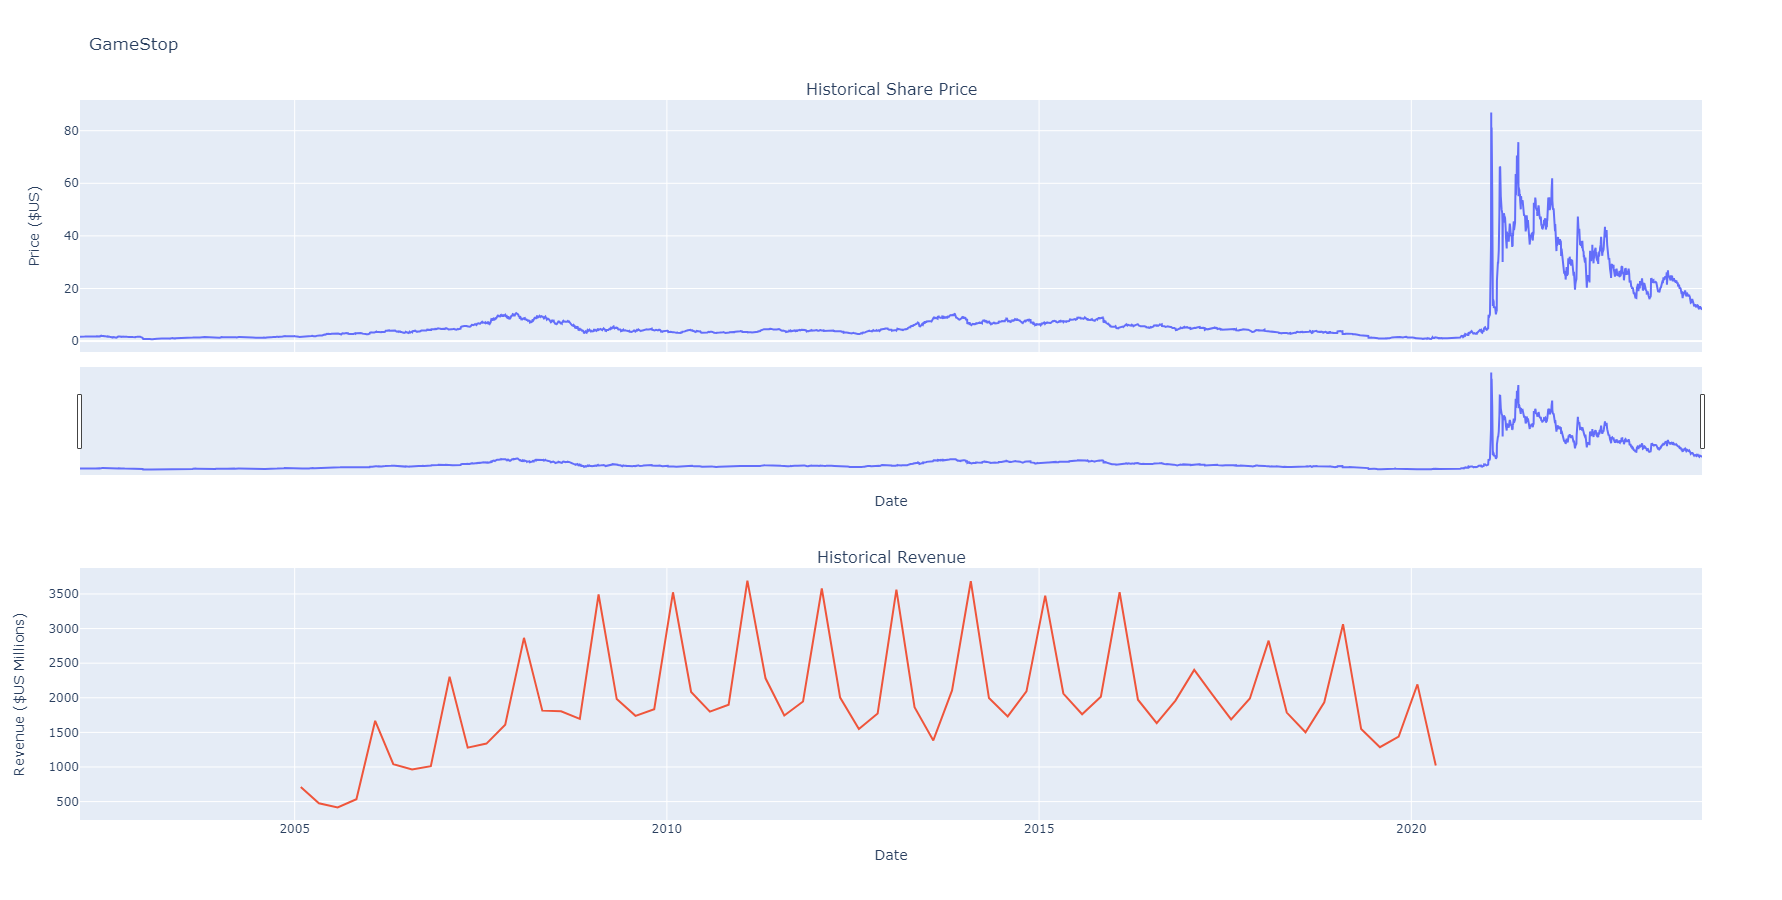

In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(gme_data, gme_revenue, 'GameStop')